In [1]:
library(spatstat)
library(ggplot2)
library(dplyr)

Warning message:
"package 'spatstat' was built under R version 3.6.3"Loading required package: spatstat.data
Warning message:
"package 'spatstat.data' was built under R version 3.6.3"Loading required package: spatstat.geom
Warning message:
"package 'spatstat.geom' was built under R version 3.6.3"spatstat.geom 2.1-0
Loading required package: spatstat.core
Warning message:
"package 'spatstat.core' was built under R version 3.6.3"Loading required package: nlme
Loading required package: rpart
spatstat.core 2.1-2
Loading required package: spatstat.linnet
Warning message:
"package 'spatstat.linnet' was built under R version 3.6.3"spatstat.linnet 2.1-1

spatstat 2.1-0       (nickname: 'Comedic violence') 
For an introduction to spatstat, type 'beginner' 

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:nlme':

    collapse

The following objects are masked from 'package:stats':

    filter, lag

The 

In [2]:
# Zadanie 1
# Załadowanie danych i wyodrębnienie informacji

In [3]:
# Wczytanie danych murchison z pakietu spatstat
data(murchison)

# Wyodrębnienie procesu punktowego złóż złota
v.gold <- murchison$gold

# Wyodrębnienie danych o położeniu uskoków
v.faults <- murchison$faults

# Wyodrębnienie obszarów występowania wychodni zieleńców
v.greenstone <- murchison$greenstone


In [4]:
# 2. Rysowanie mapy z różnymi warstwami

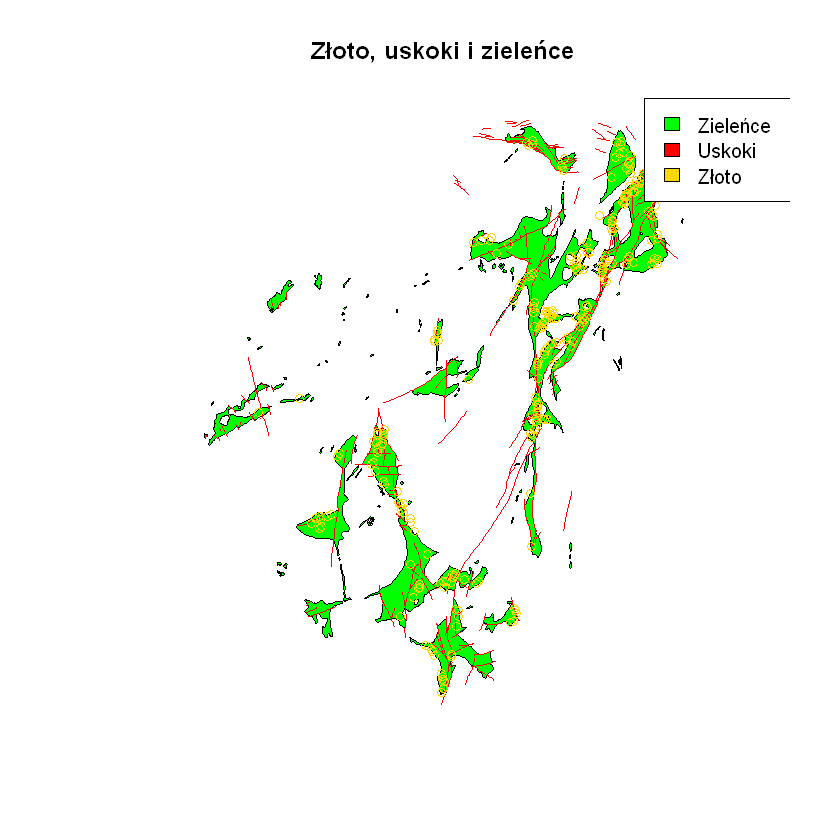

In [5]:
# Rysowanie obszarów występowania wychodni zieleńców w kolorze zielonym
plot(murchison$greenstone, col = 'green', main = "Złoto, uskoki i zieleńce")

# Dodanie położenia uskoków na mapę w kolorze czerwonym
plot(murchison$faults, add = TRUE, col = 'red')

# Dodanie lokalizacji złóż złota na mapę w kolorze złotym
plot(murchison$gold, add = TRUE, col = 'gold')

# Dodanie legendy opisującej kolory użyte na mapie
legend("topright", legend = c("Zieleńce", "Uskoki", "Złoto"), fill = c("green", "red", "gold"))

In [6]:
# Sprawdzenie klasy danych lokalizacji złóż złota
class(v.gold)



[1] "ppp"

In [7]:
# Sprawdzenie klasy danych położenia uskoków
class(v.faults)


[1] "psp"  "list"

In [8]:
# Sprawdzenie klasy danych obszarów występowania wychodni zieleńców
class(v.greenstone)

[1] "owin"

In [24]:
# 3. Obliczenie estymatora lambda dla złóż złota

In [10]:
# Podsumowanie danych lokalizacji złóż złota (liczba punktów, zakres, obszar itp.)
summary(v.gold)

Planar point pattern:  255 points
Average intensity 1.924569e-09 points per square metre

Coordinates are given to 1 decimal place
i.e. rounded to the nearest multiple of 0.1 metres

Window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres
                    (329800 x 401700 metres)
Window area = 1.32497e+11 square metres
Unit of length: 1 metre

In [11]:
# 4. Zliczanie liczby punktów w siatce 5x5

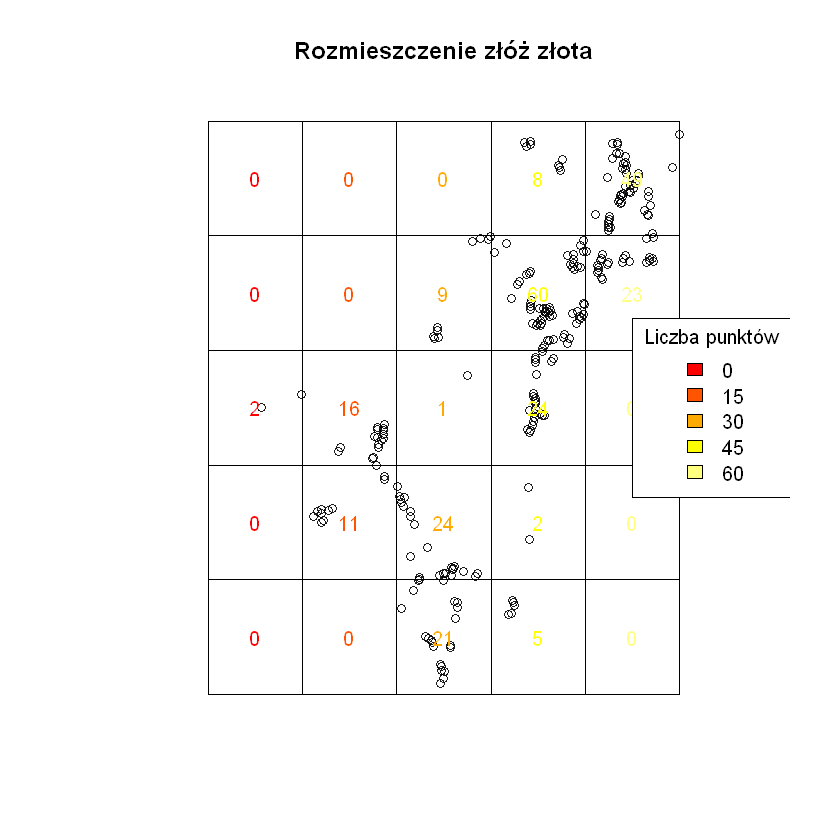

In [12]:
# Dzielenie obszaru na siatkę 5x5 i zliczanie liczby punktów w każdej kratce
grid <- quadratcount(v.gold, nx = 5, ny = 5)

# Rysowanie mapy rozmieszczenia złóż złota
plot(v.gold, main = "Rozmieszczenie złóż złota")

# Dodanie siatki z wynikami zliczania punktów na mapę
plot(grid, add = TRUE, col = heat.colors(5))

# Dodanie legendy opisującej liczbę punktów w kratkach siatki
legend("right", legend = seq(0, max(grid), length.out = 5), fill = heat.colors(5), title = "Liczba punktów")

In [13]:
# 5. Test jednorodności rozmieszczenia

In [14]:
# Przeprowadzenie testu jednorodności rozmieszczenia punktów w siatce 5x5
test_result <- quadrat.test(v.gold, nx = 5, ny = 5)

# Wyświetlenie wyników testu jednorodności
print(test_result)



	Chi-squared test of CSR using quadrat counts

data:  v.gold
X2 = 595.88, df = 24, p-value < 2.2e-16
alternative hypothesis: two.sided

Quadrats: 5 by 5 grid of tiles


In [15]:
# 6. Estymator jądrowy gęstości

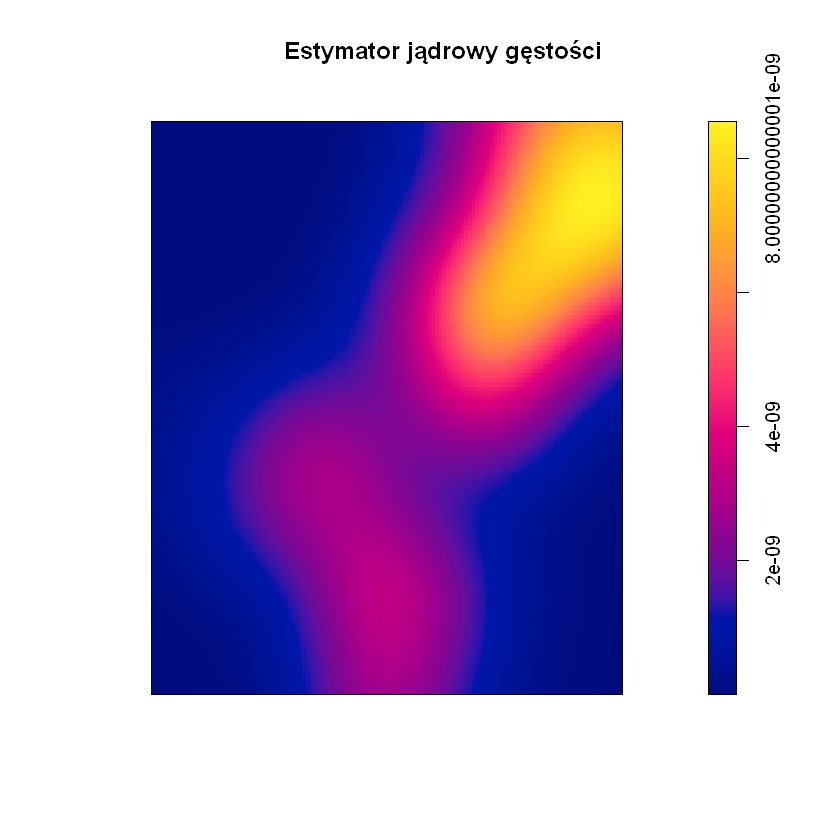

In [16]:
# Obliczenie estymatora jądrowego gęstości dla lokalizacji złóż złota
density_estimator <- density(v.gold)

# Rysowanie mapy intensywności na podstawie estymatora jądrowego
plot(density_estimator, main = "Estymator jądrowy gęstości")


In [17]:
# 7. Analiza wyniku estymatora jądrowego

In [18]:
# Wyświetlenie wyników obliczeń estymatora jądrowego
print(density_estimator)


real-valued pixel image
128 x 128 pixel array (ny, nx)
enclosing rectangle: [352780, 682590] x [6699700, 7101500] metres


In [19]:
# Podsumowanie statystyk estymatora jądrowego
summary(density_estimator)

real-valued pixel image
128 x 128 pixel array (ny, nx)
enclosing rectangle: [352782.9, 682589.6] x [6699742, 7101484] metres
dimensions of each pixel: 2580 x 3138.609 metres
Image is defined on the full rectangular grid
Frame area = 132497203271.401 square metres
Pixel values
	range = [1.42788e-14, 8.555355e-09]
	integral = 265.3118
	mean = 2.002396e-09

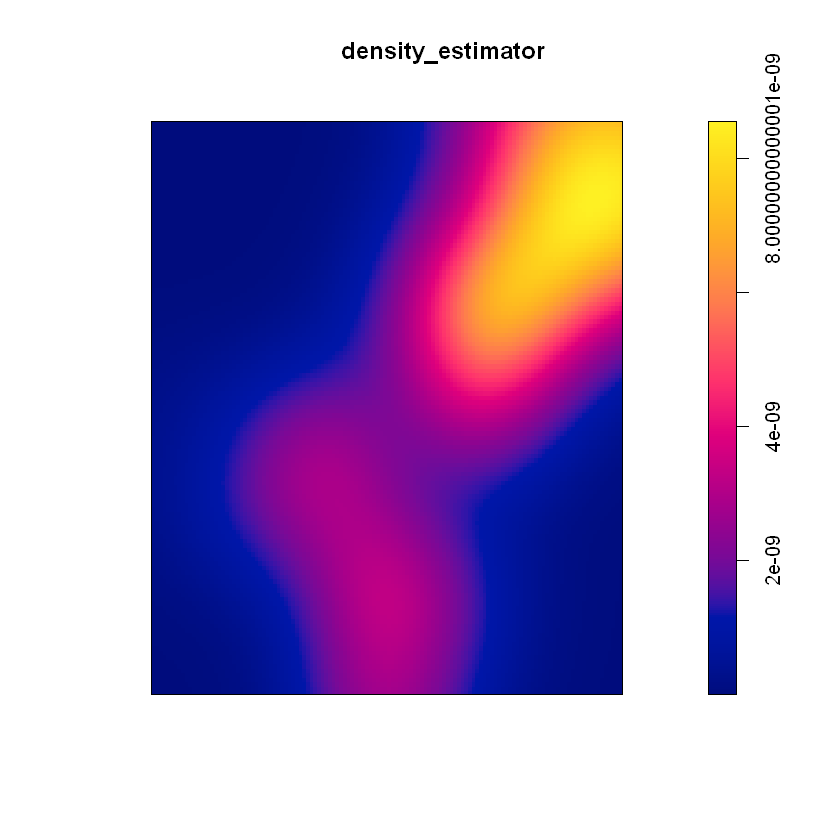

In [20]:
# Rysowanie mapy intensywności na podstawie estymatora jądrowego
plot(density_estimator)

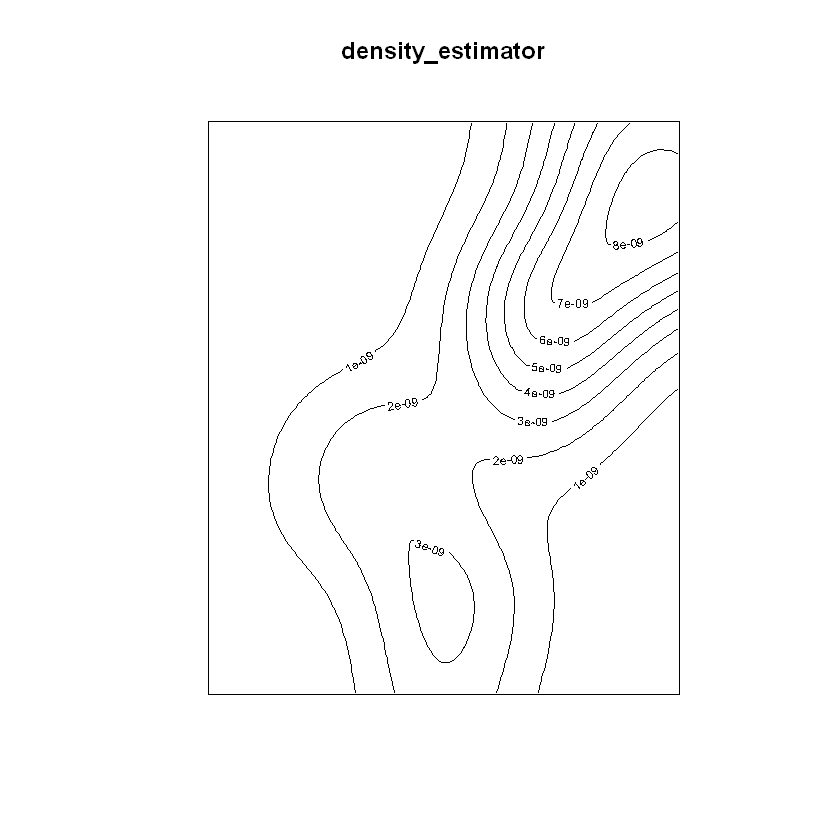

In [21]:
# Rysowanie izolinii intensywności (mapa konturowa)
contour(density_estimator)

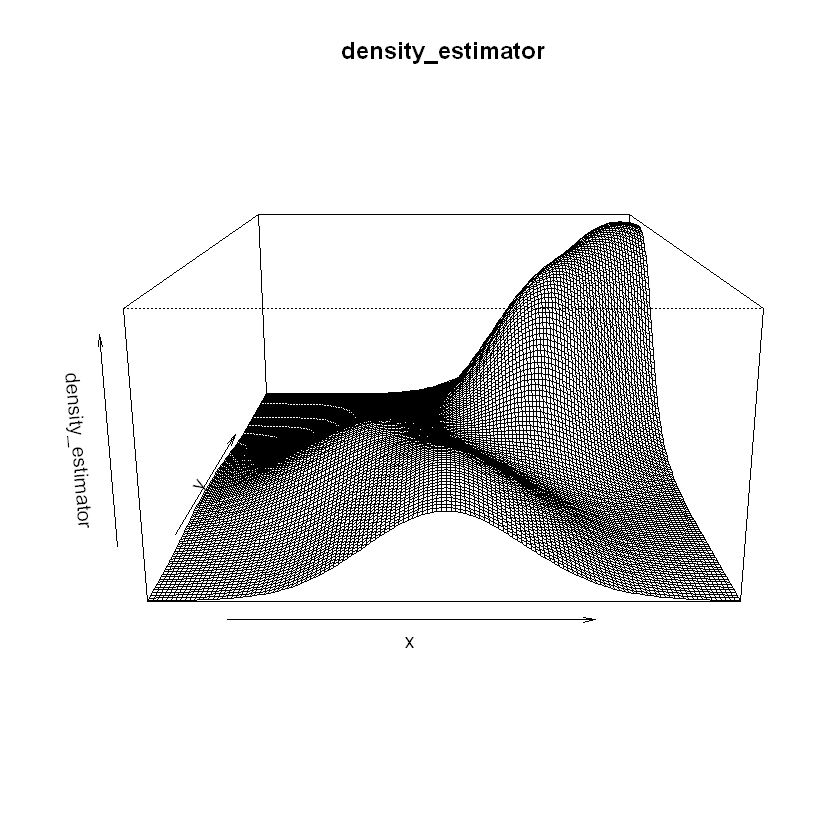

In [22]:
# Rysowanie mapy 3D intensywności na podstawie estymatora jądrowego
persp(density_estimator)